In [1]:
import os

import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

# Let's go through an example to see what a single data file looks like

In [12]:
# Directory where the 4-7 Hz filtered signals are stored
data_dir = '/shared/rsaas/nschiou2/FOS/matfiles/channel_space/pc04-07avg_rs/'

# Example .mat file for subject 127 montage a
pc04 = sio.loadmat(os.path.join(data_dir, 'psc127a.avm'))

### The header file contains information about recording

In [6]:
boxy_hdr = {k: v for (k, v) in zip(list(pc04['boxy_hdr'].dtype.fields), [v[0][0] for v in pc04['boxy_hdr'][0][0]])}
fs = boxy_hdr['sample_rate']
boxy_hdr

{'n_dig_aux': 0,
 'n_a2d_aux': 0,
 'n_dets': 8,
 'n_srcs': 16,
 'n_chans': 128,
 'CCF': 6250,
 'n_skipped': 2,
 'n_waves_avg': 8,
 'n_cycles_avg': 1,
 'n_acq_per_wave': 8,
 'sample_rate': 39.0625,
 'period': 0.0256,
 'period_ms': 25.6,
 'n_points': 3925,
 'record': array(['\texmux\t'], dtype='<U7')}

## The trial data contains event information, AC, DC, and phase recordings.

### The second column of the event data corresponds with the following trial types:  
#### Response Modality (Hand/Voice) x Switch (NoSwitch/Switch) x Stimulus Modality (Vis/Aud) x Response (R/L)

1 = HNoVR:&nbsp;&nbsp;&nbsp;Manual&nbsp;&nbsp;&nbsp;NoSwitch&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
2 = HNoVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left    
3 = HNoAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right  
4 = HNoAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

5 = HSwVR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Switch&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
6 = HSwVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  
7 = HSwAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right   
8 = HSwAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

9 = VNoVR:&nbsp;&nbsp;&nbsp;Vocal&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;NoSwitch&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
10= VNoVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left   
11= VNoAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right  
12= VNoAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

13= VSwVR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Switch&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
14= VSwVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left   
15= VSwAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right  
16= VSwAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

In [7]:
events = pd.DataFrame(pc04['trial_data'][0][0][0], columns=['event', 'trial_type'])
print('shape:', events.shape)
events.head()

shape: (402, 2)


,event,trial_type
0,320,14
1,476,11
2,631,8
3,787,16
4,1099,3


### Each of the AC/DC/phase arrays are size (156, 128, 402)

156 is the number of data points in the trial   
128 is the number of channels for this montage  
402 is the total number of trials for this montage  

In [8]:
dc_data = pc04['trial_data'][0][0][1]
ac_data = pc04['trial_data'][0][0][2]
ph_data = pc04['trial_data'][0][0][3]

### Full four second recording

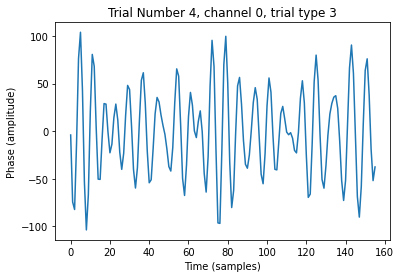

In [9]:
channel_num = 0
trial_num = 4
trial_label = events.loc[trial_num, 'trial_type']

plt.plot(ph_data[:, channel_num, trial_num])
plt.xlabel('Time (samples)')
plt.ylabel('Phase (amplitude)')
plt.title(f'Trial Number {trial_num}, channel {channel_num}, trial type {trial_label}')
plt.show()

### Response time window recording (300-900 ms after response stimulus)

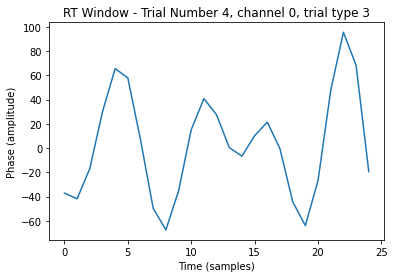

In [10]:
rt_start = int(np.floor((1 + 300. / 1000) * fs))
rt_end = int(np.ceil((1 + 900. / 1000) * fs))

plt.plot(ph_data[rt_start:rt_end, channel_num, trial_num])
plt.xlabel('Time (samples)')
plt.ylabel('Phase (amplitude)')
plt.title(f'RT Window - Trial Number {trial_num}, channel {channel_num}, trial type {trial_label}')
plt.show()

# Now let's look at a voxel_data data file

In [743]:
# Directory where the no bandpass signals are stored
data_dir = '/shared/rsaas/nschiou2/FOS/matfiles/voxel_space/pc0.1-12avg_rl_cropped/'

# Example .mat file for subject 154 montage e
pc00 = sio.loadmat(os.path.join(data_dir, 'psc154e.avm'))

### The header file contains information about recording

In [744]:
boxy_hdr = {k: v for (k, v) in zip(list(pc00['boxy_hdr'].dtype.fields), [v[0][0] for v in pc00['boxy_hdr'][0][0]])}
fs = boxy_hdr['sample_rate']
boxy_hdr

{'n_dig_aux': 0,
 'n_a2d_aux': 0,
 'n_dets': 8,
 'n_srcs': 16,
 'n_chans': 128,
 'CCF': 6250,
 'n_skipped': 2,
 'n_waves_avg': 8,
 'n_cycles_avg': 1,
 'n_acq_per_wave': 8,
 'sample_rate': 39.0625,
 'period': 0.0256,
 'period_ms': 25.6,
 'n_points': 3925,
 'record': array(['\texmux\t'], dtype='<U7')}

## The trial data contains event information, AC, DC, and phase recordings.

### The second column of the event data corresponds with the following trial types:  
#### Response Modality (Hand/Voice) x Switch (NoSwitch/Switch) x Stimulus Modality (Vis/Aud) x Response (R/L)

1 = HNoVR:&nbsp;&nbsp;&nbsp;Manual&nbsp;&nbsp;&nbsp;NoSwitch&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
2 = HNoVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left    
3 = HNoAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right  
4 = HNoAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

5 = HSwVR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Switch&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
6 = HSwVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  
7 = HSwAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right   
8 = HSwAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

9 = VNoVR:&nbsp;&nbsp;&nbsp;Vocal&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;NoSwitch&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
10= VNoVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left   
11= VNoAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right  
12= VNoAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

13= VSwVR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Switch&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
14= VSwVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left   
15= VSwAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right  
16= VSwAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

In [745]:
events = pd.DataFrame(pc00['trial_data'][0][0][0], columns=['event', 'trial_type'])
print('shape:', events.shape)
events.head()

shape: (447, 2)


,event,trial_type
0,337,5
1,496,14
2,665,11
3,808,7
4,966,4


### Each of the AC/DC/phase arrays are size (56, 128, 447)

56 is the number of data points in the trial   
128 is the number of channels for this montage  
355 is the total number of trials for this montage  

In [746]:
dc_data = pc00['trial_data'][0][0][1]
ac_data = pc00['trial_data'][0][0][2]
ph_data = pc00['trial_data'][0][0][3]

In [747]:
ph_data.shape

(56, 128, 447)

### Each of the AC/DC/phase matrices are size (6, 7, 56, 447, 2, 2)

6 is the number of voxels in the ROI along the x-axis  
7 is the number of voxels in the ROI along the y-axis  
56 is the number of data points in the trial  
477 is the total number of trials for this montage  
2 is the number of ROIs where index 0 corresponds with the left hemisphere and index 1 corresponds with the right hemisphere   
2 is the dimensions of various masks (index 0 corresponds to the averaged values and index 1 corresponds to the number of channels averaged)

In [748]:
dc_voxel = pc00['voxel'][0][0][0]
ac_voxel = pc00['voxel'][0][0][1]
ph_voxel = pc00['voxel'][0][0][2]

In [749]:
ph_voxel.shape

(6, 7, 56, 447, 2, 2)

### Left hemisphere averaged values

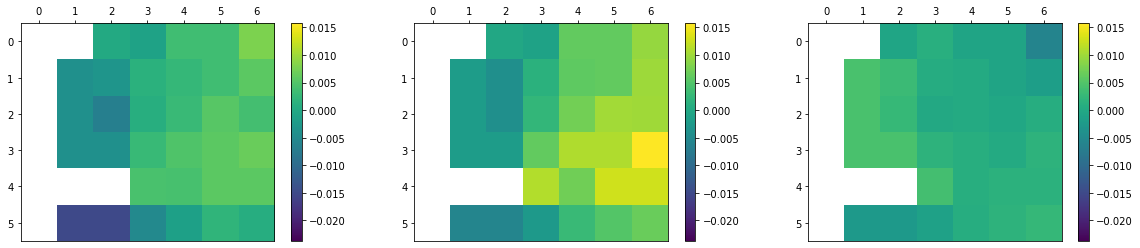

In [750]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
vmin = np.nanmin(ph_voxel[:, :, 30:41, 4, 0, 0])
vmax = np.nanmax(ph_voxel[:, :, 30:41, 4, 0, 0])

left = ax[0].imshow(ph_voxel[:, :, 30, 4, 0, 0], vmin=vmin, vmax=vmax)
ax[0].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[0].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[0].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[0].figure.colorbar(left, ax=ax[0])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[1].imshow(ph_voxel[:, :, 35, 4, 0, 0], vmin=vmin, vmax=vmax)
ax[1].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[1].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[1].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[1].figure.colorbar(left, ax=ax[1])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[2].imshow(ph_voxel[:, :, 40, 4, 0, 0], vmin=vmin, vmax=vmax)
ax[2].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[2].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[2].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[2].figure.colorbar(left, ax=ax[2])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

### Left hemisphere number of channels heatmap

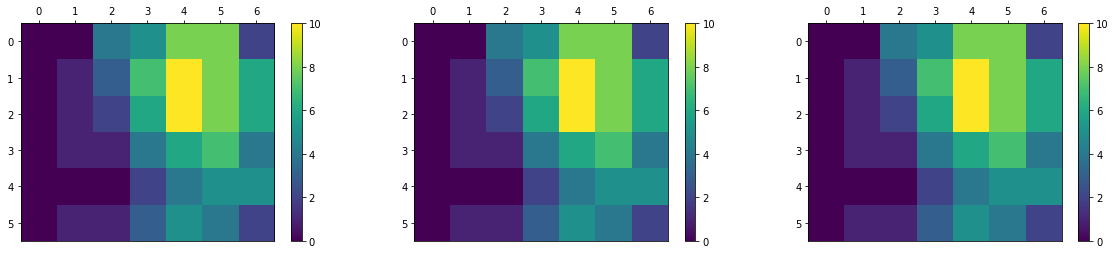

In [751]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
vmin = np.nanmin(ph_voxel[:, :, 30:41, 4, 0, 1])
vmax = np.nanmax(ph_voxel[:, :, 30:41, 4, 0, 1])

left = ax[0].imshow(ph_voxel[:, :, 30, 4, 0, 1], vmin=vmin, vmax=vmax)
ax[0].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[0].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[0].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[0].figure.colorbar(left, ax=ax[0])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[1].imshow(ph_voxel[:, :, 35, 4, 0, 1], vmin=vmin, vmax=vmax)
ax[1].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[1].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[1].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[1].figure.colorbar(left, ax=ax[1])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[2].imshow(ph_voxel[:, :, 40, 4, 0, 1], vmin=vmin, vmax=vmax)
ax[2].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[2].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[2].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[2].figure.colorbar(left, ax=ax[2])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

In [752]:
temp = np.sum(ph_voxel[:, :, 40, 4, 0, 1] != 0)
print('# nonzero vox =', temp)

# nonzero vox = 33


In [753]:
temp = np.where(ph_voxel[:, :, 40, 4, 0, 1] != 0, ph_voxel[:, :, 40, 4, 0, 1], np.nan)
print('avg # chan/vox =', np.nanmean(temp))

avg # chan/vox = 4.545454545454546


We want to reshape these arrays so the y-coordinate corresponds with the rows and the x-coordinate corresponds with the columns

In [754]:
dc_voxel = np.rot90(dc_voxel, axes=(0, 1))
ac_voxel = np.rot90(ac_voxel, axes=(0, 1))
ph_voxel = np.rot90(ph_voxel, axes=(0, 1))

### Plot a heatmap of activations for a sequence of time points

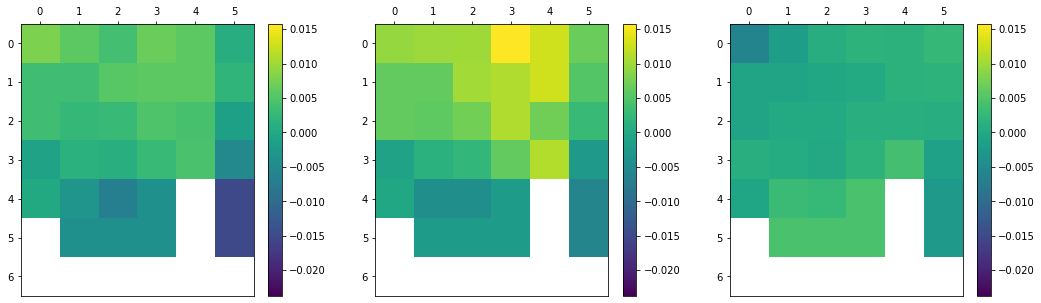

In [755]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
vmin = np.nanmin(ph_voxel[:, :, 30:41, 4, 0, 0])
vmax = np.nanmax(ph_voxel[:, :, 30:41, 4, 0, 0])

left = ax[0].imshow(ph_voxel[:, :, 30, 4, 0, 0], vmin=vmin, vmax=vmax)
ax[0].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[0].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[0].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[0].figure.colorbar(left, ax=ax[0])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[1].imshow(ph_voxel[:, :, 35, 4, 0, 0], vmin=vmin, vmax=vmax)
ax[1].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[1].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[1].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[1].figure.colorbar(left, ax=ax[1])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[2].imshow(ph_voxel[:, :, 40, 4, 0, 0], vmin=vmin, vmax=vmax)
ax[2].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[2].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[2].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[2].figure.colorbar(left, ax=ax[2])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

### We can do the same for the right hemisphere

In [756]:
dc_voxel = pc00['voxel'][0][0][0]
ac_voxel = pc00['voxel'][0][0][1]
ph_voxel = pc00['voxel'][0][0][2]

### Right hemisphere averaged values

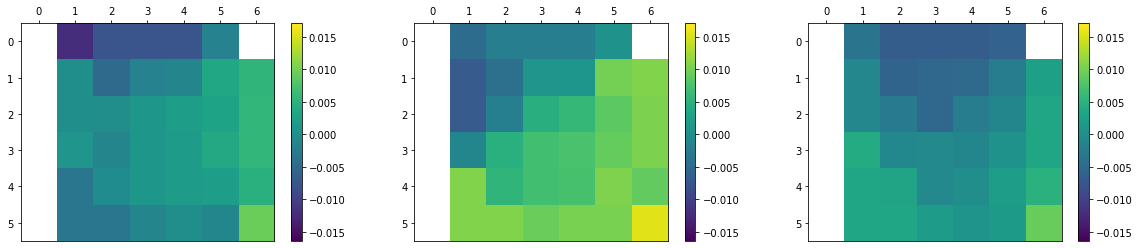

In [757]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
vmin = np.nanmin(ph_voxel[:, :, 30:41, 4, 1, 0])
vmax = np.nanmax(ph_voxel[:, :, 30:41, 4, 1, 0])

left = ax[0].imshow(ph_voxel[:, :, 30, 4, 1, 0], vmin=vmin, vmax=vmax)
ax[0].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[0].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[0].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[0].figure.colorbar(left, ax=ax[0])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[1].imshow(ph_voxel[:, :, 35, 4, 1, 0], vmin=vmin, vmax=vmax)
ax[1].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[1].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[1].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[1].figure.colorbar(left, ax=ax[1])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[2].imshow(ph_voxel[:, :, 40, 4, 1, 0], vmin=vmin, vmax=vmax)
ax[2].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[2].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[2].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[2].figure.colorbar(left, ax=ax[2])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

### Right hemisphere number of channels heatmap

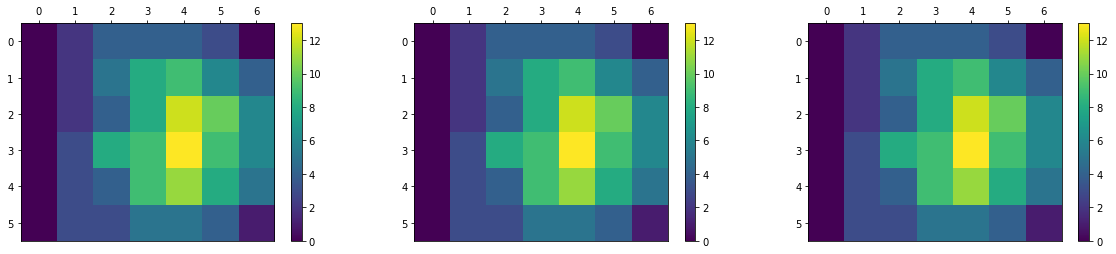

In [758]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
vmin = np.nanmin(ph_voxel[:, :, 30:41, 4, 1, 1])
vmax = np.nanmax(ph_voxel[:, :, 30:41, 4, 1, 1])

left = ax[0].imshow(ph_voxel[:, :, 30, 4, 1, 1], vmin=vmin, vmax=vmax)
ax[0].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[0].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[0].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[0].figure.colorbar(left, ax=ax[0])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[1].imshow(ph_voxel[:, :, 35, 4, 1, 1], vmin=vmin, vmax=vmax)
ax[1].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[1].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[1].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[1].figure.colorbar(left, ax=ax[1])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[2].imshow(ph_voxel[:, :, 40, 4, 1, 1], vmin=vmin, vmax=vmax)
ax[2].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[2].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[2].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[2].figure.colorbar(left, ax=ax[2])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

In [759]:
temp = np.sum(ph_voxel[:, :, 40, 4, 1, 1] != 0)
print('# nonzero vox =', temp)

# nonzero vox = 35


In [760]:
temp = np.where(ph_voxel[:, :, 40, 4, 1, 1] != 0, ph_voxel[:, :, 40, 4, 0, 1], np.nan)
print('avg # chan/vox =', np.nanmean(temp))

avg # chan/vox = 4.228571428571429


In [761]:
dc_voxel = np.rot90(dc_voxel, axes=(0, 1))
ac_voxel = np.rot90(ac_voxel, axes=(0, 1))
ph_voxel = np.rot90(ph_voxel, axes=(0, 1))

### Plot a heatmap of activations for a sequence of time points

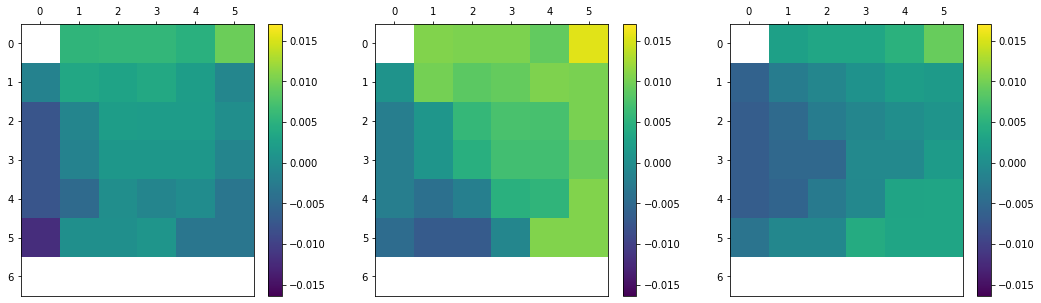

In [762]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
vmin = np.nanmin(ph_voxel[:, :, 30:41, 4, 1, 0])
vmax = np.nanmax(ph_voxel[:, :, 30:41, 4, 1, 0])

left = ax[0].imshow(ph_voxel[:, :, 30, 4, 1, 0], vmin=vmin, vmax=vmax)
ax[0].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[0].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[0].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[0].figure.colorbar(left, ax=ax[0])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[1].imshow(ph_voxel[:, :, 35, 4, 1, 0], vmin=vmin, vmax=vmax)
ax[1].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[1].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[1].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[1].figure.colorbar(left, ax=ax[1])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[2].imshow(ph_voxel[:, :, 40, 4, 1, 0], vmin=vmin, vmax=vmax)
ax[2].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[2].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[2].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[2].figure.colorbar(left, ax=ax[2])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

## Flatten 2D matrix into 1D (ROI)

If we were to flatten these 2D ROIs by taking voxels along the positive y-direction and then along the positive x-direction, it would look something like this:

In [763]:
curr_data = ph_voxel[:, :, 30, 4, 0, :]
curr_data.shape

(7, 6, 2)

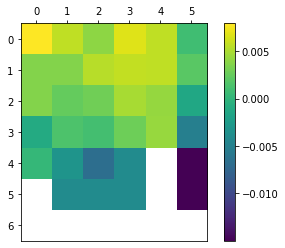

In [764]:
fig, ax = plt.subplots()

left = ax.imshow(curr_data[:, :, 0])
ax.set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax.set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax.figure.colorbar(left, ax=ax)
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

Need to flip vertically to start indexing from the bottom

In [765]:
curr_data = curr_data[::-1, :, :]

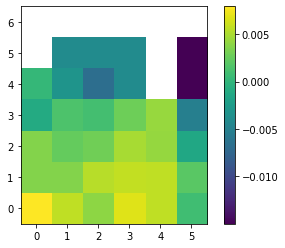

In [766]:
fig, ax = plt.subplots()

left = ax.imshow(curr_data[:, :, 0])
ax.set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax.set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax.set_yticklabels(labels=np.arange(ph_voxel.shape[0] - 1, -1, -1))
cbar = ax.figure.colorbar(left, ax=ax)
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

In [767]:
left = curr_data[:, :, 0].flatten('F')
right = curr_data[:, :, 1].flatten('F')

## Let's store the single-trial voxel data so it's ready for input into the model

In [768]:
curr_data = ph_voxel[:, :, :, 4, :, 0]
curr_data.shape

(7, 6, 56, 2)

In [769]:
# Flip so we can index starting from the bottom-left
curr_data = curr_data[::-1, :, :, :]

In [770]:
# Transpose y (row) and x (col) dimensions so we can use a simple reshape operation to flatten dimensions
curr_data = np.transpose(curr_data, (1, 0, 2, 3))
curr_data.shape

(6, 7, 56, 2)

In [771]:
# Flatten 2D voxel representation into 1D, taking voxels in the positive y-direction then positive x-direction
voxel_input = curr_data.reshape((-1, curr_data.shape[2], curr_data.shape[3]))
voxel_input.shape

(42, 56, 2)

In [772]:
left = voxel_input[:, :, 0]
right = voxel_input[:, :, 1]
left.shape, right.shape

((42, 56), (42, 56))

In [773]:
# Concatenate left and right hemisphere data
combined_lr = np.concatenate([left, right], axis=0)
combined_lr.shape

(84, 56)

## Averaged across both sub-montages

In [41]:
# Directory where the no bandpass signals are stored
data_dir = '/shared/rsaas/nschiou2/FOS/matfiles/voxel_space/pc0.1-12avg_rl_cropped/'

# Example .mat file for subject 154 combined montages e and f
pc00 = sio.loadmat(os.path.join(data_dir, 'psc154ef.avm'))
pc00['voxel'] = pc00.pop('voxel_avg')

### The header file contains information about recording

In [42]:
boxy_hdr = {k: v for (k, v) in zip(list(pc00['boxy_hdr'].dtype.fields), [v[0][0] for v in pc00['boxy_hdr'][0][0]])}
fs = boxy_hdr['sample_rate']
boxy_hdr

{'n_dig_aux': 0,
 'n_a2d_aux': 0,
 'n_dets': 8,
 'n_srcs': 16,
 'n_chans': 128,
 'CCF': 6250,
 'n_skipped': 2,
 'n_waves_avg': 8,
 'n_cycles_avg': 1,
 'n_acq_per_wave': 8,
 'sample_rate': 39.0625,
 'period': 0.0256,
 'period_ms': 25.6,
 'n_points': 3925,
 'record': array(['\texmux\t'], dtype='<U7')}

## The trial data contains event information, AC, DC, and phase recordings.

### The second column of the event data corresponds with the following trial types:  
#### Response Modality (Hand/Voice) x Switch (NoSwitch/Switch) x Stimulus Modality (Vis/Aud) x Response (R/L)

1 = HNoVR:&nbsp;&nbsp;&nbsp;Manual&nbsp;&nbsp;&nbsp;NoSwitch&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
2 = HNoVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left    
3 = HNoAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right  
4 = HNoAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

5 = HSwVR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Switch&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
6 = HSwVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  
7 = HSwAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right   
8 = HSwAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

9 = VNoVR:&nbsp;&nbsp;&nbsp;Vocal&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;NoSwitch&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
10= VNoVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left   
11= VNoAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right  
12= VNoAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

13= VSwVR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Switch&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
14= VSwVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left   
15= VSwAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right  
16= VSwAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

In [43]:
events = pd.DataFrame(pc00['trial_data'][0][0][0], columns=['event', 'trial_type'])
print('shape:', events.shape)
events.head()

shape: (447, 2)


,event,trial_type
0,337,5
1,496,14
2,665,11
3,808,7
4,966,4


### Each of the AC/DC/phase matrices are size (6, 7, 56, 447, 2)

6 is the number of voxels in the ROI along the x-axis  
7 is the number of voxels in the ROI along the y-axis  
56 is the number of data points in the trial  
477 is the total number of trials for this montage  
2 is the number of ROIs where index 0 corresponds with the left hemisphere and index 1 corresponds with the right hemisphere

In [61]:
dc_voxel = pc00['voxel'][0][0][0]
ac_voxel = pc00['voxel'][0][0][1]
ph_voxel = pc00['voxel'][0][0][2]

### Left hemisphere averaged values

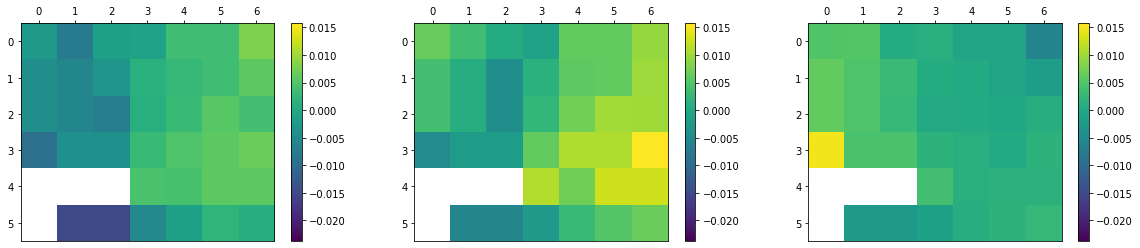

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
vmin = np.nanmin(ph_voxel[:, :, 30:41, 4, 0])
vmax = np.nanmax(ph_voxel[:, :, 30:41, 4, 0])

left = ax[0].imshow(ph_voxel[:, :, 30, 4, 0], vmin=vmin, vmax=vmax)
ax[0].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[0].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[0].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[0].figure.colorbar(left, ax=ax[0])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[1].imshow(ph_voxel[:, :, 35, 4, 0], vmin=vmin, vmax=vmax)
ax[1].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[1].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[1].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[1].figure.colorbar(left, ax=ax[1])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[2].imshow(ph_voxel[:, :, 40, 4, 0], vmin=vmin, vmax=vmax)
ax[2].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[2].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[2].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[2].figure.colorbar(left, ax=ax[2])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

In [63]:
temp = np.sum(~np.isnan(ph_voxel[:, :, 40, 4, 0]))
print('# nonzero vox =', temp)

# nonzero vox = 38


We want to reshape these arrays so the y-coordinate corresponds with the rows and the x-coordinate corresponds with the columns

In [64]:
dc_voxel = np.rot90(dc_voxel, axes=(0, 1))
ac_voxel = np.rot90(ac_voxel, axes=(0, 1))
ph_voxel = np.rot90(ph_voxel, axes=(0, 1))

### Plot a heatmap of activations for a sequence of time points

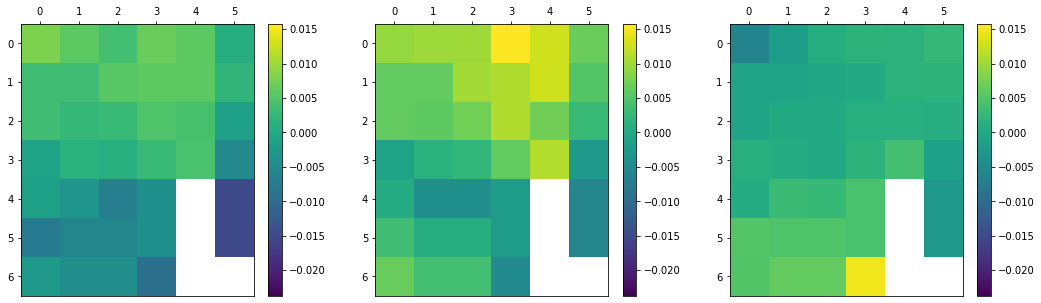

In [65]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
vmin = np.nanmin(ph_voxel[:, :, 30:41, 4, 0])
vmax = np.nanmax(ph_voxel[:, :, 30:41, 4, 0])

left = ax[0].imshow(ph_voxel[:, :, 30, 4, 0], vmin=vmin, vmax=vmax)
ax[0].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[0].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[0].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[0].figure.colorbar(left, ax=ax[0])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[1].imshow(ph_voxel[:, :, 35, 4, 0], vmin=vmin, vmax=vmax)
ax[1].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[1].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[1].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[1].figure.colorbar(left, ax=ax[1])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[2].imshow(ph_voxel[:, :, 40, 4, 0], vmin=vmin, vmax=vmax)
ax[2].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[2].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[2].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[2].figure.colorbar(left, ax=ax[2])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

### We can do the same for the right hemisphere

In [66]:
dc_voxel = pc00['voxel'][0][0][0]
ac_voxel = pc00['voxel'][0][0][1]
ph_voxel = pc00['voxel'][0][0][2]

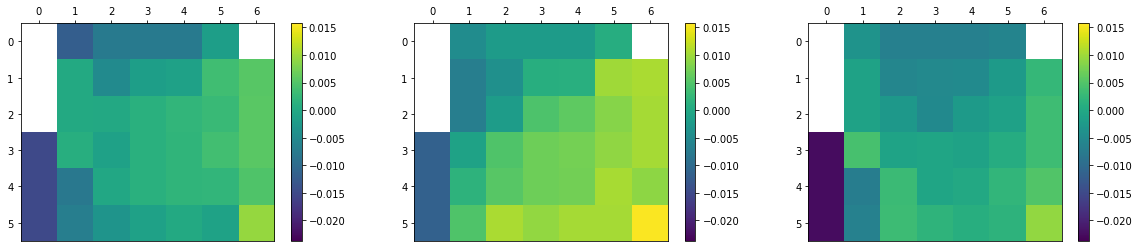

In [60]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
vmin = np.nanmin(ph_voxel[:, :, 30:41, 4, 0])
vmax = np.nanmax(ph_voxel[:, :, 30:41, 4, 0])

left = ax[0].imshow(ph_voxel[:, :, 30, 4, 1], vmin=vmin, vmax=vmax)
ax[0].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[0].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[0].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[0].figure.colorbar(left, ax=ax[0])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[1].imshow(ph_voxel[:, :, 35, 4, 1], vmin=vmin, vmax=vmax)
ax[1].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[1].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[1].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[1].figure.colorbar(left, ax=ax[1])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[2].imshow(ph_voxel[:, :, 40, 4, 1], vmin=vmin, vmax=vmax)
ax[2].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[2].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[2].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[2].figure.colorbar(left, ax=ax[2])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

In [51]:
temp = np.sum(~np.isnan(ph_voxel[:, :, 40, 4, 1]))
print('# nonzero vox =', temp)

# nonzero vox = 38


In [52]:
dc_voxel = np.rot90(dc_voxel, axes=(0, 1))
ac_voxel = np.rot90(ac_voxel, axes=(0, 1))
ph_voxel = np.rot90(ph_voxel, axes=(0, 1))

### Plot a heatmap of activations for a sequence of time points

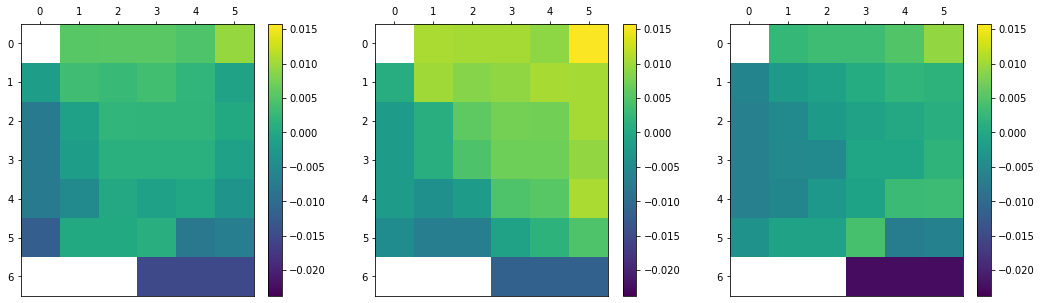

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
vmin = np.nanmin(ph_voxel[:, :, 30:41, 4, 0])
vmax = np.nanmax(ph_voxel[:, :, 30:41, 4, 0])

left = ax[0].imshow(ph_voxel[:, :, 30, 4, 1], vmin=vmin, vmax=vmax)
ax[0].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[0].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[0].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[0].figure.colorbar(left, ax=ax[0])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[1].imshow(ph_voxel[:, :, 35, 4, 1], vmin=vmin, vmax=vmax)
ax[1].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[1].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[1].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[1].figure.colorbar(left, ax=ax[1])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

left = ax[2].imshow(ph_voxel[:, :, 40, 4, 1], vmin=vmin, vmax=vmax)
ax[2].set_xticks(ticks=np.arange(ph_voxel.shape[1]))
ax[2].set_yticks(ticks=np.arange(ph_voxel.shape[0]))
ax[2].tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cbar = ax[2].figure.colorbar(left, ax=ax[2])
cbar.ax.set_ylabel('', rotation=-90, va='bottom');

# Data Pre-Processing into Pandas DataFrame

## Store event, trial type, and AC/DC/phase data in Pandas DataFrame

Higher-level organization:
* Subject ID
* Montage type
* Frequency band

Lower-level organization:
* AC/DC/phase can be stored in lists
* Event and trial type as columns
* Header information

Moved to script

In [ ]:
data_dir = '/shared/rsaas/nschiou2/EROS/python/'

all_data = pd.read_parquet(os.path.join(data_dir, 'all_single_trial_filt_chan.parquet'))

In [ ]:
# Filter phase features only
ph_data = all_data[[c for c in all_data.columns if ('ac_' not in c) and ('dc_' not in c)]]

ph_data.to_parquet(os.path.join(data_dir, 'phase_filt_chan.parquet'), index=False)

In [20]:
# Filter RT window for phase data only
ph_RT = ph_data[[c for c in ph_data.columns if 'rt_' in c]]

ph_RT.to_parquet(os.path.join(data_dir, 'phase_RT_filt_chan.parquet'), index=False)

# Visualize CSP-transformed signals

In [13]:
data_dir = '/shared/rsaas/nschiou2/EROS/python/'

df = pd.read_parquet(os.path.join(data_dir, 'CSP_filt_16_RT.parquet'))

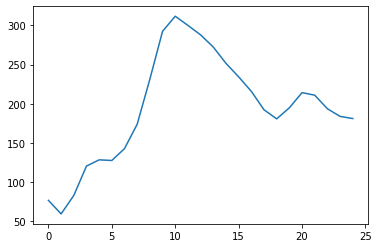

In [16]:
plt.plot(df.loc[0, 'csp_0'])

In [8]:
data_dir = '/shared/rsaas/nschiou2/EROS/python/'

df = pd.read_parquet(os.path.join(data_dir, 'CSP_filt_16_all.parquet'))

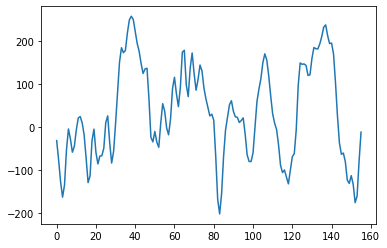

In [11]:
plt.plot(df.loc[0, 'csp_0'])